In [1]:
import numpy as np
import os
import re
import sys
import random
import time
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data_frame1 = pd.read_csv('result_cache_size_0_nolog_blosc.csv',index_col='Time Steps')
data_frame1["Normalized Compression Calls"] = data_frame1["Compression Calls"]/data_frame1["Number of iterations"]
data_frame1["Normalized Decompression Calls"] = data_frame1["Decompression Calls"]/data_frame1["Number of iterations"]
data_frame2 = pd.read_csv('result_cache_size_1_nolog_blosc.csv',index_col='Time Steps')
data_frame3 = pd.read_csv('result_cache_size_2_nolog_blosc.csv',index_col='Time Steps')
data_frame4 = pd.read_csv('result_cache_size_4_nolog_blosc.csv',index_col='Time Steps')
data_frame5 = pd.read_csv('result_cache_size_8_nolog_blosc.csv',index_col='Time Steps')
data_frame6 = pd.read_csv('result_cache_size_10_nolog_blosc.csv',index_col='Time Steps')
all_data_frames = [data_frame1,data_frame2,data_frame3,data_frame4,data_frame5,data_frame6]
for i in all_data_frames:
    i["Normalized Compression Calls"] = i["Compression Calls"]/i["Number of iterations"]
    i["Normalized Decompression Calls"] = i["Decompression Calls"]/i["Number of iterations"]
    i["Compression Time (Cache compress)"] = i["Compression Time (Cache)"]-(i["Compression Time (Evictions)"]+i["Compression Time (Put)"])
    i["Decompression Time (Cache decompress)"] = i["Decompression Time (Cache)"]-(i["Decompression Time (Evictions)"]+i["Decompression Time (Put)"])

In [3]:
all_data_frames[0]

,Compression Calls,Decompression Calls,Compression Time (No Cache),Compression Time (Cache),Compression Time (Evictions),Compression Time (Put),Compression Time (Update),Decompression Time (No Cache),Decompression Time (Cache),Decompression Time (Evictions),Decompression Time (Put),Decompression Time (Get),Total Time (compression),Total Time (decompression),Cache Invalidates,Number of iterations,Normalized Compression Calls,Normalized Decompression Calls,Compression Time (Cache compress),Decompression Time (Cache decompress)
Time Steps,,,,,,,,,,,,,,,,,,,,
0.001,3558,4627,0.117646,0,0,0,0,0.413875,0,0,0,0,0,0,0,9,395.333333,514.111111,0,0
0.002,3555,4625,0.114129,0,0,0,0,0.413050,0,0,0,0,0,0,0,9,395.000000,513.888889,0,0
0.003,3932,5115,0.126216,0,0,0,0,0.445312,0,0,0,0,0,0,0,10,393.200000,511.500000,0,0
0.004,3555,4625,0.114522,0,0,0,0,0.406084,0,0,0,0,0,0,0,9,395.000000,513.888889,0,0
0.005,3932,5115,0.135533,0,0,0,0,0.478596,0,0,0,0,0,0,0,10,393.200000,511.500000,0,0
0.006,3932,5115,0.138669,0,0,0,0,0.491914,0,0,0,0,0,0,0,10,393.200000,511.500000,0,0
0.007,3932,5115,0.137984,0,0,0,0,0.491575,0,0,0,0,0,0,0,10,393.200000,511.500000,0,0
0.008,3932,5115,0.148451,0,0,0,0,0.526501,0,0,0,0,0,0,0,10,393.200000,511.500000,0,0
0.009,3932,5115,0.137126,0,0,0,0,0.484779,0,0,0,0,0,0,0,10,393.200000,511.500000,0,0


In [7]:
all_data_frames2 = all_data_frames[0].mean()
all_data_frames3 = all_data_frames[1].mean()
all_data_frames4 = all_data_frames[2].mean()
all_data_frames5 = all_data_frames[3].mean()
all_data_frames6 = all_data_frames[4].mean()
all_data_frames7 = all_data_frames[5].mean()
all_data_frames2

Compression Calls                        3819.200000
Decompression Calls                      4968.200000
Compression Time (No Cache)                 0.129599
Compression Time (Cache)                    0.000000
Compression Time (Evictions)                0.000000
Compression Time (Put)                      0.000000
Compression Time (Update)                   0.000000
Decompression Time (No Cache)               0.459979
Decompression Time (Cache)                  0.000000
Decompression Time (Evictions)              0.000000
Decompression Time (Put)                    0.000000
Decompression Time (Get)                    0.000000
Total Time (compression)                    0.000000
Total Time (decompression)                  0.000000
Cache Invalidates                           0.000000
Number of iterations                        9.700000
Normalized Compression Calls              393.773333
Normalized Decompression Calls            512.238889
Compression Time (Cache compress)           0.

In [8]:
all_data_frames3

Compression Calls                        3723.800000
Decompression Calls                      4346.300000
Compression Time (No Cache)                 0.000000
Compression Time (Cache)                    0.315685
Compression Time (Evictions)                0.133766
Compression Time (Put)                      0.018586
Compression Time (Update)                   0.000273
Decompression Time (No Cache)               0.000000
Decompression Time (Cache)                  0.649713
Decompression Time (Evictions)              0.176866
Decompression Time (Put)                    0.016658
Decompression Time (Get)                    0.001811
Total Time (compression)                    0.315958
Total Time (decompression)                  0.651523
Cache Invalidates                        8039.800000
Number of iterations                        9.700000
Normalized Compression Calls              383.935556
Normalized Decompression Calls            448.116667
Compression Time (Cache compress)           0.

In [9]:
all_data_frames4

Compression Calls                        3723.800000
Decompression Calls                      4346.300000
Compression Time (No Cache)                 0.000000
Compression Time (Cache)                    0.311255
Compression Time (Evictions)                0.131076
Compression Time (Put)                      0.017063
Compression Time (Update)                   0.000281
Decompression Time (No Cache)               0.000000
Decompression Time (Cache)                  0.636452
Decompression Time (Evictions)              0.175907
Decompression Time (Put)                    0.015456
Decompression Time (Get)                    0.001960
Total Time (compression)                    0.311537
Total Time (decompression)                  0.638412
Cache Invalidates                        8039.700000
Number of iterations                        9.700000
Normalized Compression Calls              383.935556
Normalized Decompression Calls            448.116667
Compression Time (Cache compress)           0.

In [10]:
all_data_frames5

Compression Calls                        3721.500000
Decompression Calls                      4185.000000
Compression Time (No Cache)                 0.000000
Compression Time (Cache)                    0.312905
Compression Time (Evictions)                0.132713
Compression Time (Put)                      0.018508
Compression Time (Update)                   0.000276
Decompression Time (No Cache)               0.000000
Decompression Time (Cache)                  0.621786
Decompression Time (Evictions)              0.169842
Decompression Time (Put)                    0.016035
Decompression Time (Get)                    0.002247
Total Time (compression)                    0.313181
Total Time (decompression)                  0.624033
Cache Invalidates                        7874.100000
Number of iterations                        9.700000
Normalized Compression Calls              383.695556
Normalized Decompression Calls            431.477778
Compression Time (Cache compress)           0.

In [11]:
all_data_frames6

Compression Calls                        3265.900000
Decompression Calls                      3068.100000
Compression Time (No Cache)                 0.000000
Compression Time (Cache)                    0.313991
Compression Time (Evictions)                0.128566
Compression Time (Put)                      0.017671
Compression Time (Update)                   0.001823
Decompression Time (No Cache)               0.000000
Decompression Time (Cache)                  0.504743
Decompression Time (Evictions)              0.137289
Decompression Time (Put)                    0.012294
Decompression Time (Get)                    0.005735
Total Time (compression)                    0.315815
Total Time (decompression)                  0.510478
Cache Invalidates                        5831.600000
Number of iterations                        9.700000
Normalized Compression Calls              336.728889
Normalized Decompression Calls            316.314444
Compression Time (Cache compress)           0.

In [12]:
all_data_frames7

Compression Calls                        2124.100000
Decompression Calls                       650.200000
Compression Time (No Cache)                 0.000000
Compression Time (Cache)                    0.140848
Compression Time (Evictions)                0.037558
Compression Time (Put)                      0.009855
Compression Time (Update)                   0.005211
Decompression Time (No Cache)               0.000000
Decompression Time (Cache)                  0.097726
Decompression Time (Evictions)              0.015919
Decompression Time (Put)                    0.002224
Decompression Time (Get)                    0.009729
Total Time (compression)                    0.146059
Total Time (decompression)                  0.107454
Cache Invalidates                        1129.200000
Number of iterations                        9.700000
Normalized Compression Calls              219.001111
Normalized Decompression Calls             67.025556
Compression Time (Cache compress)           0.

Text(0, 0.5, 'Compression Calls')

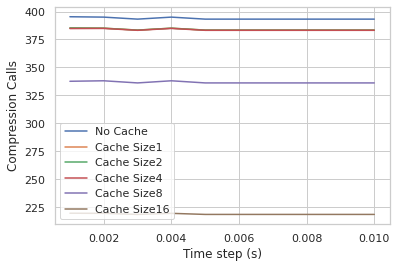

In [7]:
cache_size = [1,2,4,8,16]
ax = all_data_frames[0].plot(y='Normalized Compression Calls',label='No Cache')
for i in range(1,len(all_data_frames)):
    all_data_frames[i].plot(ax=ax,y='Normalized Compression Calls',label='Cache Size'+str(cache_size[i-1]))
plt.xlabel('Time step (s)')
plt.ylabel('Compression Calls')

Text(0, 0.5, 'Decompression Calls')

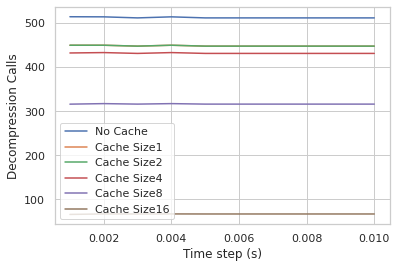

In [8]:
cache_size = [1,2,4,8,16]
ax = all_data_frames[0].plot(y='Normalized Decompression Calls',label='No Cache')
for i in range(1,len(all_data_frames)):
    all_data_frames[i].plot(ax=ax,y='Normalized Decompression Calls',label='Cache Size'+str(cache_size[i-1]))
plt.xlabel('Time step (s)')
plt.ylabel('Decompression Calls')

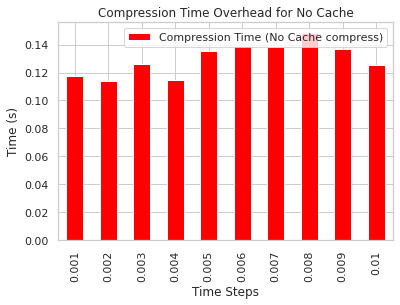

In [9]:
all_df = []
df = pd.DataFrame({'Compression Time (No Cache compress)':all_data_frames[0]['Compression Time (No Cache)']})
df.plot(kind='bar', stacked=True, color=['red'])
plt.ylabel('Time (s)')
plt.title('Compression Time Overhead for No Cache')
plt.savefig('Comp_time_no_cache.png')
all_df.append(df)

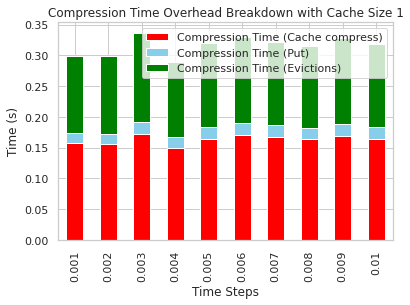

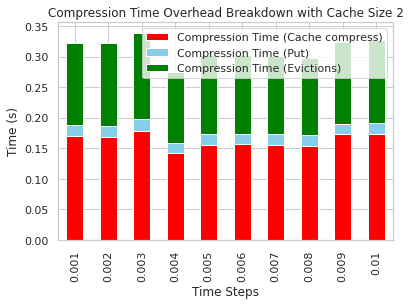

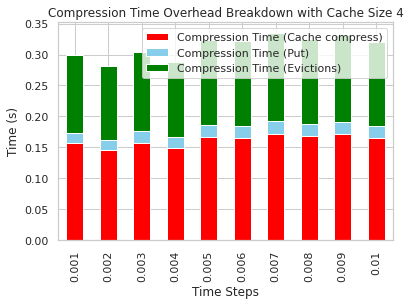

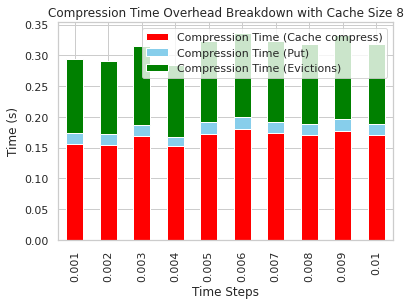

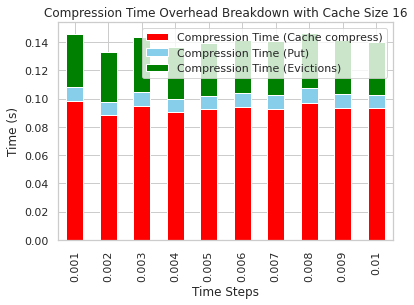

In [10]:
# create stacked bar chart for monthly temperatures
for i in range(1,len(all_data_frames)):
    df = pd.DataFrame({'Compression Time (Cache compress)':all_data_frames[i]['Compression Time (Cache compress)'],'Compression Time (Put)':all_data_frames[i]['Compression Time (Put)'],'Compression Time (Evictions)':all_data_frames[i]['Compression Time (Evictions)']})
    df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
    plt.ylabel('Time (s)')
    plt.title('Compression Time Overhead Breakdown with Cache Size '+str(cache_size[i-1]))
    plt.savefig('Comp_time_cache_size_'+str(cache_size[i-1])+'.png')
    all_df.append(df)

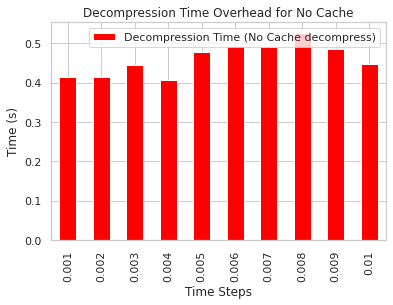

In [11]:
all_df = []
df = pd.DataFrame({'Decompression Time (No Cache decompress)':all_data_frames[0]['Decompression Time (No Cache)']})
df.plot(kind='bar', stacked=True, color=['red'])
plt.ylabel('Time (s)')
plt.title('Decompression Time Overhead for No Cache')
plt.savefig('Decomp_time_no_cache.png')
all_df.append(df)

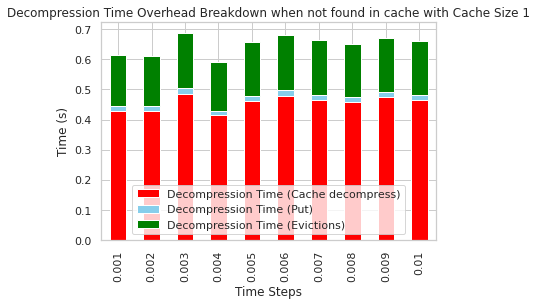

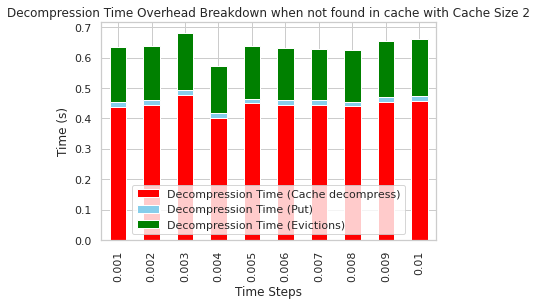

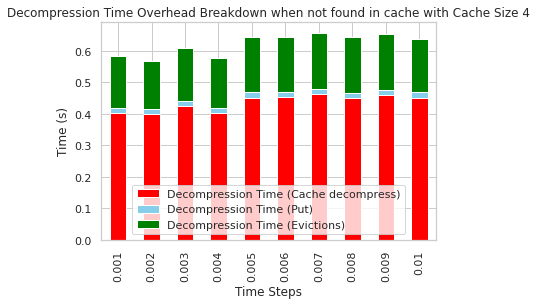

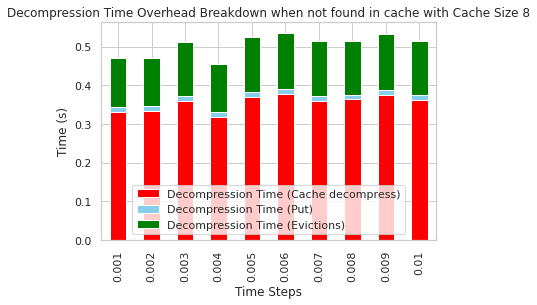

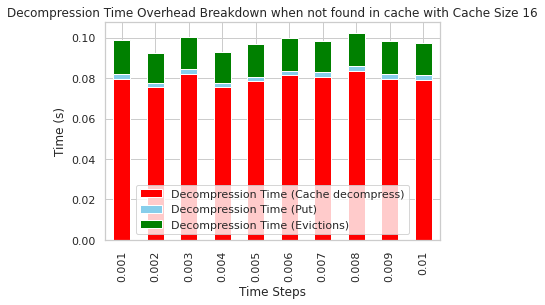

In [12]:
# create stacked bar chart for monthly temperatures
for i in range(1,len(all_data_frames)):
    df = pd.DataFrame({'Decompression Time (Cache decompress)':all_data_frames[i]['Decompression Time (Cache decompress)'],'Decompression Time (Put)':all_data_frames[i]['Decompression Time (Put)'],'Decompression Time (Evictions)':all_data_frames[i]['Decompression Time (Evictions)']})
    df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
    plt.ylabel('Time (s)')
    plt.title('Decompression Time Overhead Breakdown when not found in cache with Cache Size '+str(cache_size[i-1]))
    # ax = plt.gca()
    # ax.set_ylim([ymin, ymax])
    plt.savefig('Decomp_time_cache_size_'+str(cache_size[i-1])+'.png')
    all_df.append(df)

Text(0, 0.5, 'Cache invalidates')

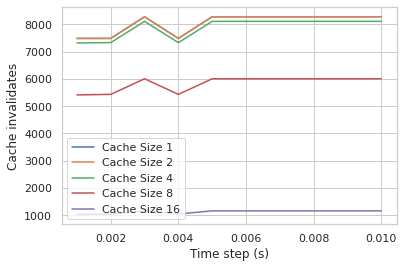

In [20]:
cache_size = [1,2,4,8,16]
ax = all_data_frames[1].plot(y='Cache Invalidates',label='Cache Size 1')
for i in range(2,len(all_data_frames)):
    all_data_frames[i].plot(ax=ax,y='Cache Invalidates',label='Cache Size '+str(cache_size[i-1]))
plt.xlabel('Time step (s)')
plt.ylabel('Cache invalidates')

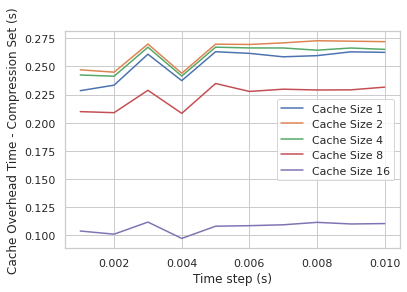

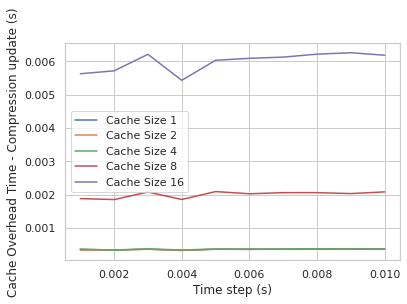

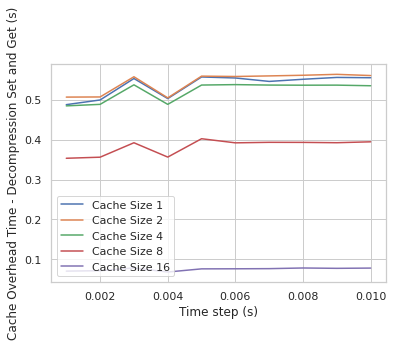

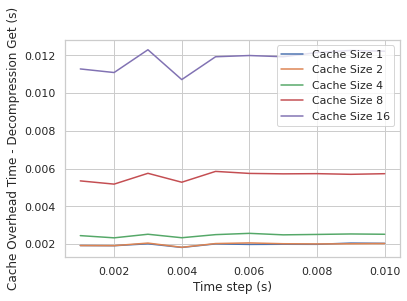